In [ ]:
!pip install opencv-python-headless pillow
!pip install scikit-learn

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab.patches import cv2_imshow

In [ ]:
# Define data paths
train_path = '/content/drive/MyDrive/data_set/train'
valid_path = '/content/drive/MyDrive/data_set/val'
test_path = '/content/drive/MyDrive/data_set/test'

In [ ]:
# Set image size and batch size
image_size = (150, 150)
batch_size = 32

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3016 images belonging to 8 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 673 images belonging to 8 classes.


Training Images:


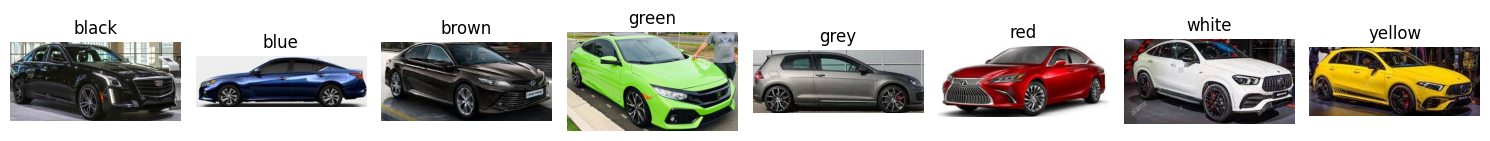

In [ ]:
# Get the class names
class_names = sorted(os.listdir(train_path))

#display training images
print("Training Images:")
fig, axs = plt.subplots(1, len(class_names), figsize=(15, 5))
for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(train_path, class_name)
    img_name = os.listdir(class_dir)[0]
    img_path = os.path.join(class_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[idx].imshow(img)
    axs[idx].set_title(class_name)
    axs[idx].axis('off')
plt.tight_layout()
plt.show()


Validation Images:


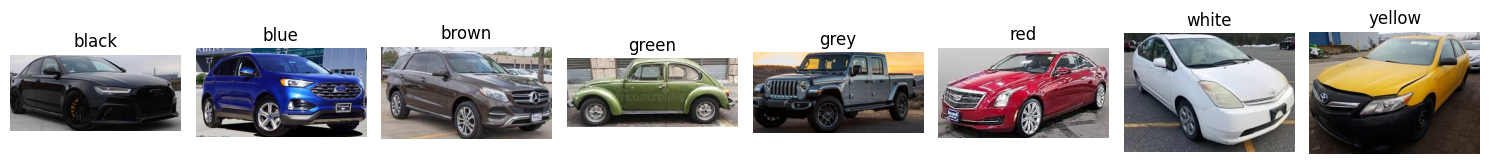

In [ ]:
# Display validation images
print("\nValidation Images:")
fig, axs = plt.subplots(1, len(class_names), figsize=(15, 5))
for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(valid_path, class_name)
    img_name = os.listdir(class_dir)[0]
    img_path = os.path.join(class_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[idx].imshow(img)
    axs[idx].set_title(class_name)
    axs[idx].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # 8 classes for colors
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Train the model
epochs = 10  # Adjust this based on your time constraints
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    verbose=1
)

Epoch 1/10
93/93 [==============================] - 706s 7s/step - loss: 1.2885 - accuracy: 0.5371 - val_loss: 0.8109 - val_accuracy: 0.7355
Epoch 2/10
93/93 [==============================] - 31s 330ms/step - loss: 0.6961 - accuracy: 0.7478 - val_loss: 0.5999 - val_accuracy: 0.8202
Epoch 3/10
93/93 [==============================] - 30s 324ms/step - loss: 0.5621 - accuracy: 0.8041 - val_loss: 0.5924 - val_accuracy: 0.7890
Epoch 4/10
93/93 [==============================] - 30s 325ms/step - loss: 0.5026 - accuracy: 0.8311 - val_loss: 0.4390 - val_accuracy: 0.8544
Epoch 5/10
93/93 [==============================] - 32s 345ms/step - loss: 0.4279 - accuracy: 0.8517 - val_loss: 0.4483 - val_accuracy: 0.8544
Epoch 6/10
93/93 [==============================] - 32s 342ms/step - loss: 0.4380 - accuracy: 0.8560 - val_loss: 0.2966 - val_accuracy: 0.9034
Epoch 7/10
93/93 [==============================] - 30s 318ms/step - loss: 0.4079 - accuracy: 0.8661 - val_loss: 0.2892 - val_accuracy: 0.9123
E

In [ ]:
# Save the trained model
model.save('/content/drive/My Drive/color_classification_model.h5')

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model_path = '/content/drive/My Drive/color_classification_model.h5'
loaded_model = load_model(model_path)

# Define the class names
class_names = sorted(train_generator.class_indices.keys())


In [ ]:

def prediction(image_path):
  # Load and preprocess an image for prediction
  img = image.load_img(image_path, target_size=image_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image

  # Make a prediction
  predictions = loaded_model.predict(img_array)
  predicted_class = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_names[predicted_class]

  print("Predicted class:", predicted_class_name)

print("Black Car image")
img_path = '/content/drive/MyDrive/VCDS/data_color/test/black/019301dea8.jpg'
prediction(img_path)
print("Black Car image")
img_path = '/content/drive/MyDrive/VCDS/data_color/test/black/070ed15b67.jpg'
prediction(img_path)
print("Black Car image")
img_path = '/content/drive/MyDrive/VCDS/data_color/test/black/4cfee615f6.jpg'
prediction(img_path)
print("Black Car image")
img_path = '/content/drive/MyDrive/VCDS/data_color/test/black/efe4586820.jpg'
prediction(img_path)

Black Car image
1/1 [==============================] - 1s 595ms/step
Predicted class: black
Black Car image
1/1 [==============================] - 0s 49ms/step
Predicted class: black
Black Car image
1/1 [==============================] - 0s 45ms/step
Predicted class: black
Black Car image
1/1 [==============================] - 0s 44ms/step
Predicted class: black


In [ ]:
#ml1 testing data
print("Black Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/black/1.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/black/2.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/black/3.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/black/4.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/black/5.png'
prediction(img_path)

Black Car images
1/1 [==============================] - 0s 52ms/step
Predicted class: black
1/1 [==============================] - 0s 52ms/step
Predicted class: black
1/1 [==============================] - 0s 65ms/step
Predicted class: black
1/1 [==============================] - 0s 63ms/step
Predicted class: black
1/1 [==============================] - 0s 44ms/step
Predicted class: grey


In [ ]:
#ml1 testing data
print("Blue Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/1.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/2.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/3.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/4.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/5.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/6.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/7.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/8.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/9.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/blue/10.png'
prediction(img_path)

Blue Car images
1/1 [==============================] - 0s 45ms/step
Predicted class: grey
1/1 [==============================] - 0s 43ms/step
Predicted class: green
1/1 [==============================] - 0s 48ms/step
Predicted class: blue
1/1 [==============================] - 0s 77ms/step
Predicted class: blue
1/1 [==============================] - 0s 83ms/step
Predicted class: blue
1/1 [==============================] - 0s 79ms/step
Predicted class: grey
1/1 [==============================] - 0s 75ms/step
Predicted class: blue
1/1 [==============================] - 0s 73ms/step
Predicted class: blue
1/1 [==============================] - 0s 70ms/step
Predicted class: blue
1/1 [==============================] - 0s 43ms/step
Predicted class: blue


In [ ]:
#ml1 testing data
print("Brown Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/brown/1.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/brown/2.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/brown/3.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/brown/4.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/brown/5.png'
prediction(img_path)

Brown Car images
1/1 [==============================] - 0s 87ms/step
Predicted class: brown
1/1 [==============================] - 0s 72ms/step
Predicted class: brown
1/1 [==============================] - 0s 63ms/step
Predicted class: brown
1/1 [==============================] - 0s 87ms/step
Predicted class: brown
1/1 [==============================] - 0s 71ms/step
Predicted class: brown


In [ ]:
#ml1 testing data
print("Gray Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/gray/1.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/gray/2.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/gray/3.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/gray/4.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/gray/5.png'
prediction(img_path)

Gray Car images
1/1 [==============================] - 0s 46ms/step
Predicted class: grey
1/1 [==============================] - 0s 43ms/step
Predicted class: grey
1/1 [==============================] - 0s 42ms/step
Predicted class: grey
1/1 [==============================] - 0s 43ms/step
Predicted class: grey
1/1 [==============================] - 0s 42ms/step
Predicted class: black


In [ ]:
#ml1 testing data
print("Green Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/green/1.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/green/2.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/green/3.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/green/4.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/green/5.png'
prediction(img_path)

Green Car images
1/1 [==============================] - 0s 71ms/step
Predicted class: green
1/1 [==============================] - 0s 76ms/step
Predicted class: green
1/1 [==============================] - 0s 76ms/step
Predicted class: green
1/1 [==============================] - 0s 76ms/step
Predicted class: green
1/1 [==============================] - 0s 96ms/step
Predicted class: green


In [ ]:
#ml1 testing data
print("Red Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/1.jpg'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/2.jpg'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/3.jpg'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/4.jpg'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/5.jpg'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/6.jpg'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/7.jpg'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/red/8.png'
prediction(img_path)

Red Car images
1/1 [==============================] - 0s 52ms/step
Predicted class: red
1/1 [==============================] - 0s 46ms/step
Predicted class: red
1/1 [==============================] - 0s 42ms/step
Predicted class: red
1/1 [==============================] - 0s 42ms/step
Predicted class: red
1/1 [==============================] - 0s 45ms/step
Predicted class: black
1/1 [==============================] - 0s 45ms/step
Predicted class: red
1/1 [==============================] - 0s 45ms/step
Predicted class: brown
1/1 [==============================] - 0s 56ms/step
Predicted class: red


In [ ]:
#ml1 testing data
print("White Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/white/1.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/white/2.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/white/3.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/white/4.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/white/5.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/white/6.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/white/7.png'
prediction(img_path)

White Car images
1/1 [==============================] - 0s 161ms/step
Predicted class: white
1/1 [==============================] - 0s 65ms/step
Predicted class: white
1/1 [==============================] - 0s 70ms/step
Predicted class: white
1/1 [==============================] - 0s 76ms/step
Predicted class: grey
1/1 [==============================] - 0s 83ms/step
Predicted class: white
1/1 [==============================] - 0s 52ms/step
Predicted class: grey
1/1 [==============================] - 0s 54ms/step
Predicted class: white


In [ ]:
#ml1 testing data
print("Yellow Car images")
img_path = '/content/drive/MyDrive/VCDS/cars_test/yellow/1.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/yellow/2.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/yellow/3.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/yellow/4.png'
prediction(img_path)
img_path = '/content/drive/MyDrive/VCDS/cars_test/yellow/5.png'
prediction(img_path)

Yellow Car images
1/1 [==============================] - 0s 122ms/step
Predicted class: yellow
1/1 [==============================] - 0s 44ms/step
Predicted class: yellow
1/1 [==============================] - 0s 44ms/step
Predicted class: yellow
1/1 [==============================] - 0s 76ms/step
Predicted class: yellow
1/1 [==============================] - 0s 81ms/step
Predicted class: yellow


In [ ]:
import os

class_names = sorted(os.listdir(train_path))

for index, class_name in enumerate(class_names):
    print(f"Class index: {index}, Class name: {class_name}")


Class index: 0, Class name: black
Class index: 1, Class name: blue
Class index: 2, Class name: brown
Class index: 3, Class name: green
Class index: 4, Class name: grey
Class index: 5, Class name: red
Class index: 6, Class name: white
Class index: 7, Class name: yellow


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the class names
class_names = sorted(train_generator.class_indices.keys())

def prediction_for_confusion_matrix(image_path):
    # Load and preprocess an image for prediction
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Make a prediction
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class]

    return predicted_class_name


In [ ]:
def fun1(data_generator):
  # Prepare data for confusion matrix and F1 score
  test_data = data_generator
  true_labels = []
  predicted_labels = []

  for i in range(len(test_data)):
      batch_x, batch_y = test_data[i]
      true_labels.extend(np.argmax(batch_y, axis=1))
      for j in range(len(batch_x)):
          img_array = np.expand_dims(batch_x[j], axis=0)
          predictions = loaded_model.predict(img_array)
          predicted_class = np.argmax(predictions, axis=1)[0]
          predicted_labels.append(predicted_class)

  # Calculate confusion matrix
  confusion_mat = confusion_matrix(true_labels, predicted_labels)
  confusion_mat = confusion_matrix(true_labels, predicted_labels)

  # Plot confusion matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.title("Confusion Matrix")
  plt.show()

  # Calculate and print classification report
  class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
  print("Classification Report:")
  print(class_report)

  f1_scores = f1_score(true_labels, predicted_labels, average=None)

  # Plot F1 scores
  plt.figure(figsize=(10, 6))
  plt.bar(class_names, f1_scores)
  plt.xlabel("Class Names")
  plt.ylabel("F1 Score")
  plt.title("F1 Scores per Class")
  plt.xticks(rotation=45)
  plt.show()


1/1 [==============================] - 0s 98ms/step


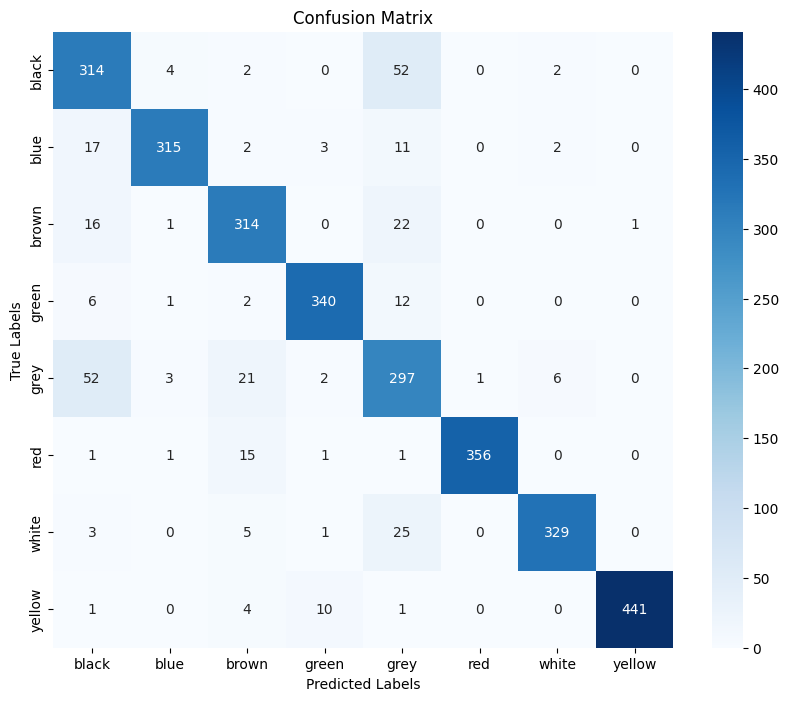

Classification Report:
              precision    recall  f1-score   support

       black       0.77      0.84      0.80       374
        blue       0.97      0.90      0.93       350
       brown       0.86      0.89      0.87       354
       green       0.95      0.94      0.95       361
        grey       0.71      0.78      0.74       382
         red       1.00      0.95      0.97       375
       white       0.97      0.91      0.94       363
      yellow       1.00      0.96      0.98       457

    accuracy                           0.90      3016
   macro avg       0.90      0.90      0.90      3016
weighted avg       0.90      0.90      0.90      3016



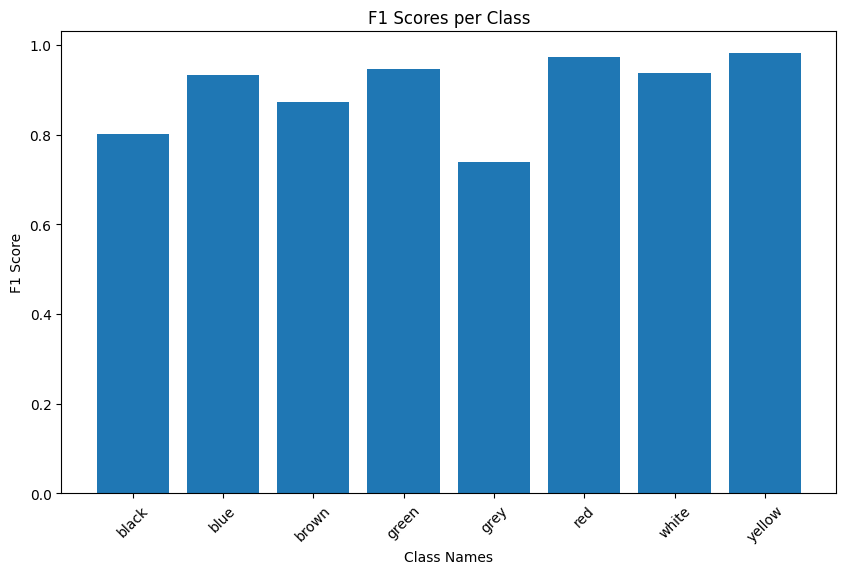

In [ ]:
fun1(train_generator)

1/1 [==============================] - 0s 64ms/step


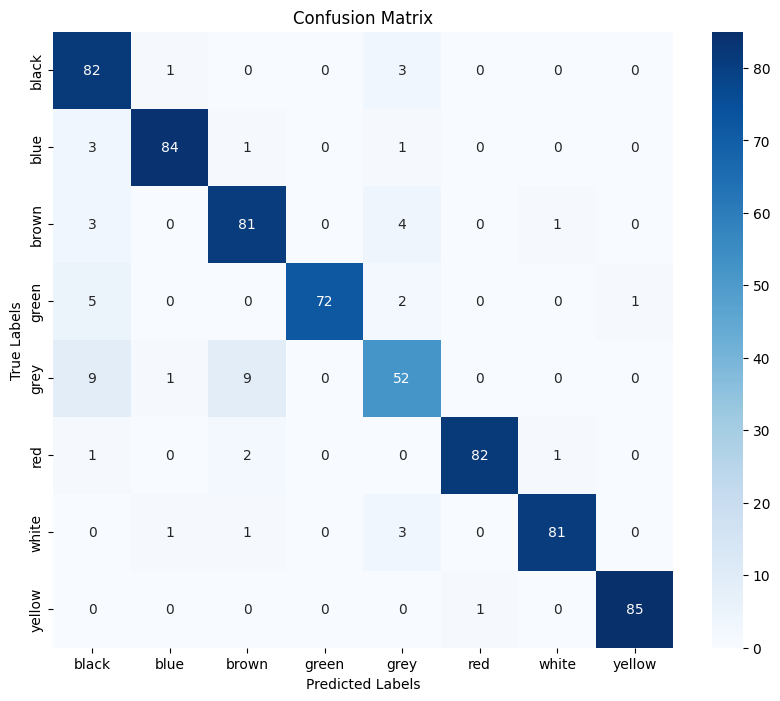

Classification Report:
              precision    recall  f1-score   support

       black       0.80      0.95      0.87        86
        blue       0.97      0.94      0.95        89
       brown       0.86      0.91      0.89        89
       green       1.00      0.90      0.95        80
        grey       0.80      0.73      0.76        71
         red       0.99      0.95      0.97        86
       white       0.98      0.94      0.96        86
      yellow       0.99      0.99      0.99        86

    accuracy                           0.92       673
   macro avg       0.92      0.92      0.92       673
weighted avg       0.92      0.92      0.92       673



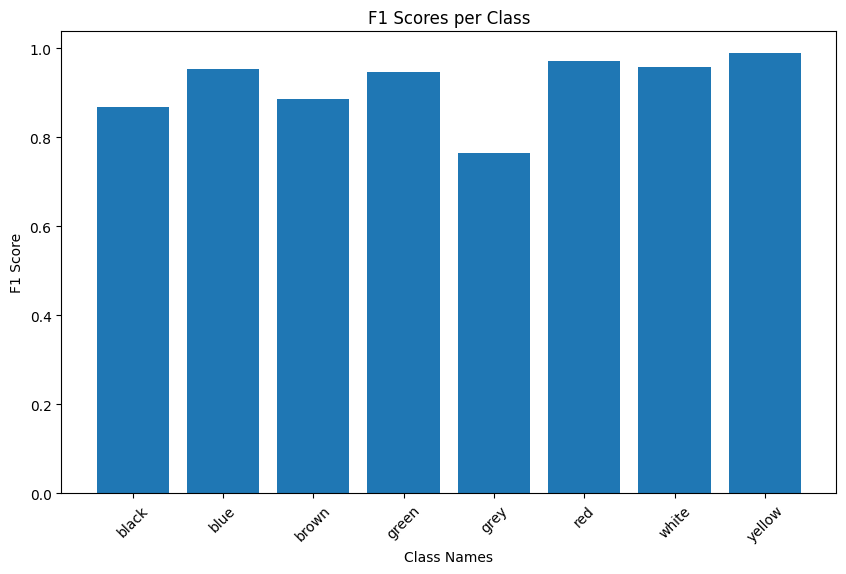

In [ ]:
fun1(valid_generator)